See the parent `Kolumbo_volcano.ipynb` notebook.

#### Notebook config

In [1]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default']) #, 'ggplot', 'kmc_test'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


##### Paths


In [2]:
path_fig = '../../figures/ch_kol/'

##### Plot config

In [3]:
plt.style.use(['default', 'seaborn-dark'])
import matplotlib
font = {'family' : 'sans-serif', # serif
        'weight' : 'normal', # bold
        'size'   : 22}
matplotlib.rc('font', **font)

##### Loading projects


In [4]:
# Box 
# in seconds
dt = 0.0025  
ns = 2000
# in metres
dx = 50      
x1 = +8.0e3     
x2 = +2.5e4    
y1 = -3.0e3    
y2 = +1.5e4    
z1 = 0 
z2 = +4.0e3    
box = [x1, x2, y1, y2, z1, z2]
bigger_box = box
geom_bigger = dict(dt=dt, ns=ns, dx=dx, box=box)

In [5]:
lll(40)
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
p14 = ProjInv('p14', path=path, **geom_bigger) # Lasso selected.

Content of  /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14/p14-Info.txt : 
 cat: /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14/p14-Info.txt: No such file or directory



In [ ]:
# from fullwavepy.ioapi.proteus import ProteusExperiment
# prot = ProteusExperiment()
# bt = Arr3d(prot.bathytopo)

# Objective function

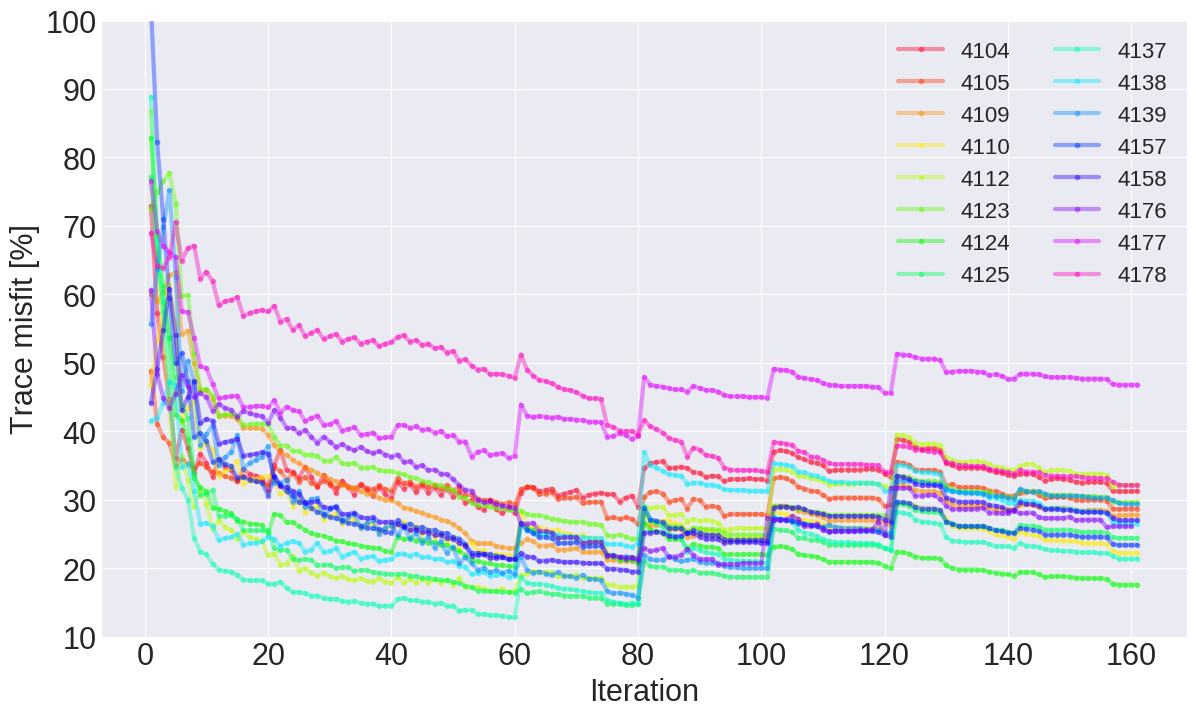

In [15]:
# plot 
figure(14,8)
p14.o.fit.plot(run_ids=[1,2], cmap='gist_rainbow')
plt.legend(prop={'size': 16}, ncol=2)
plt.grid() #color='Gray', linestyle='-', linewidth=.5)
plt.ylim(10,100)
# plt.savefig(path_fig+'kol_fit.png', bbox_inches='tight') # remove white margins
plt.show()

# Data fit

## Phase plots

### Across iterations at 3 Hz
For it > 90 fit drops.

#### OBS 105

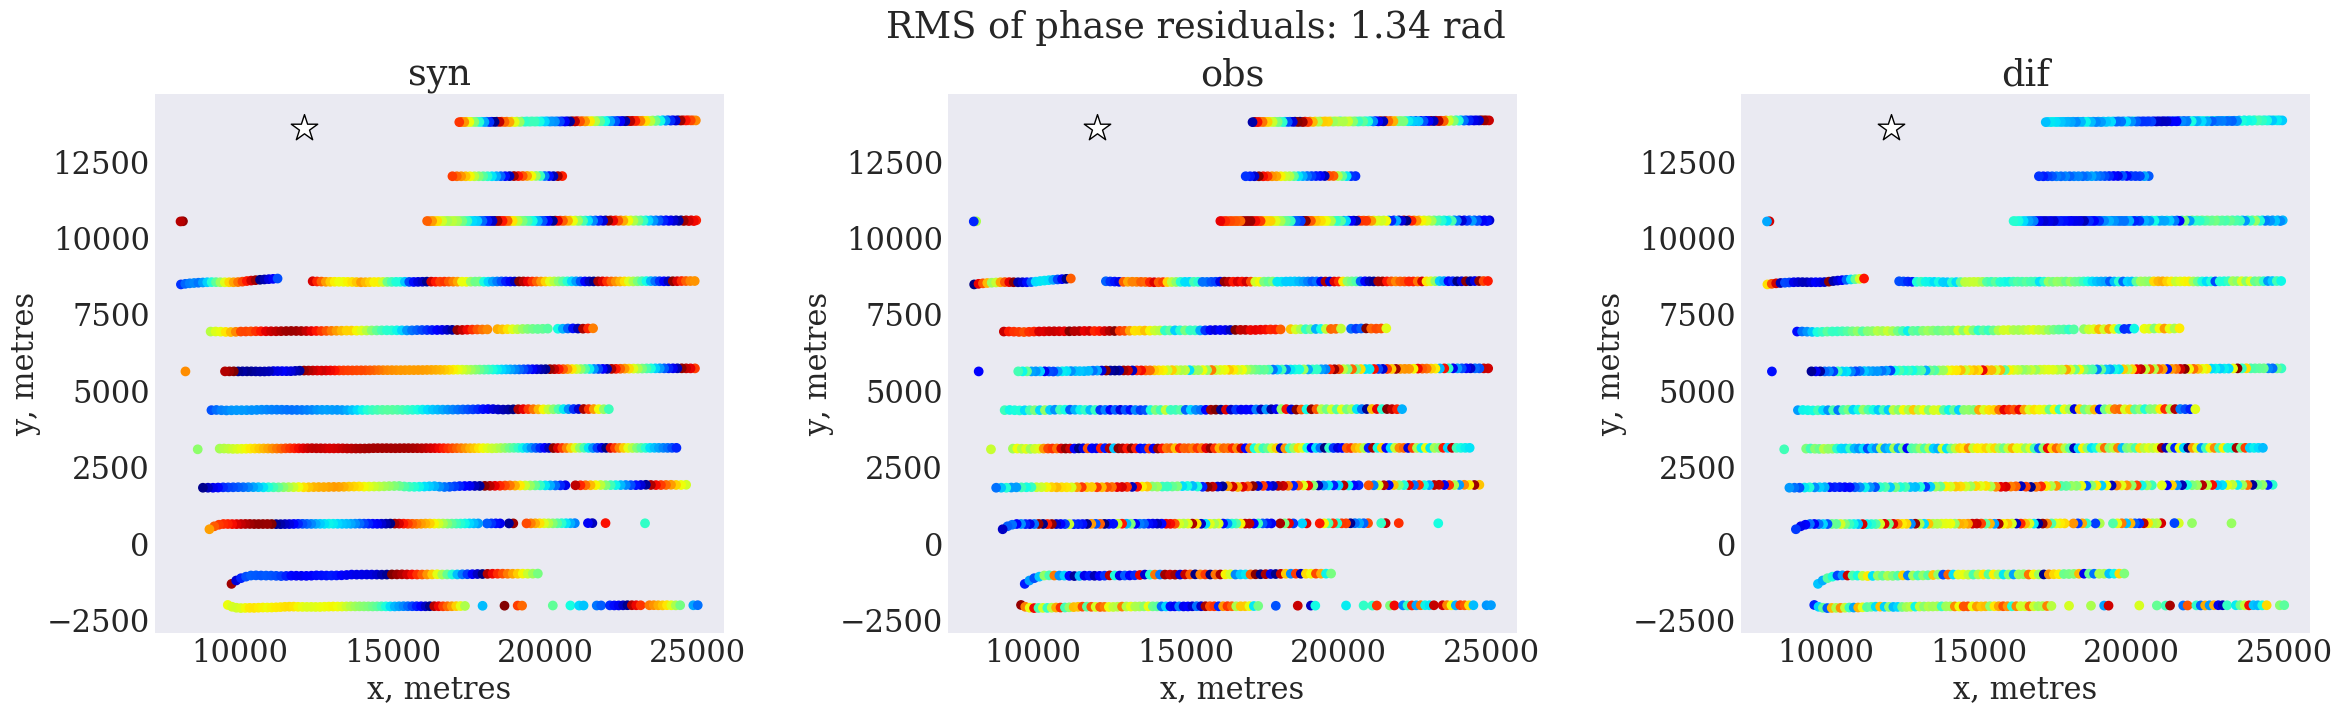

In [41]:
p14.o.dc.it[1][4105].plot_phase(freq=3, figsize=[29,7])

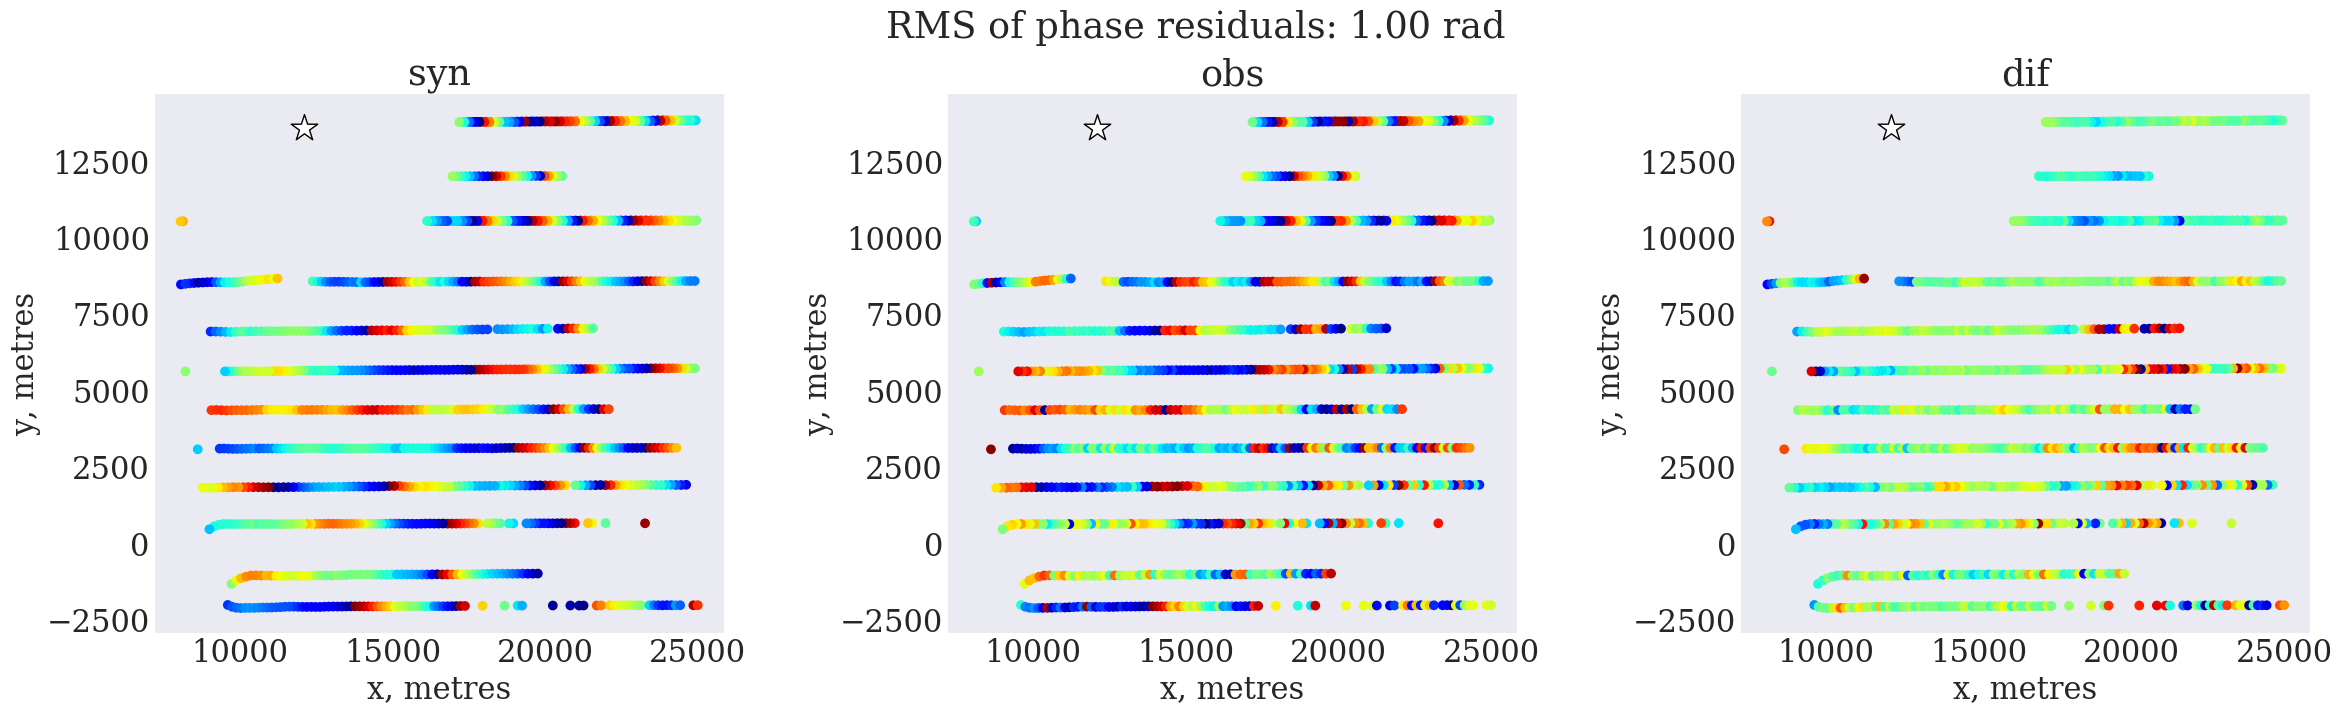

In [63]:
p14.o.dc.it[90][4105].plot_phase(freq=3, figsize=[29,7])

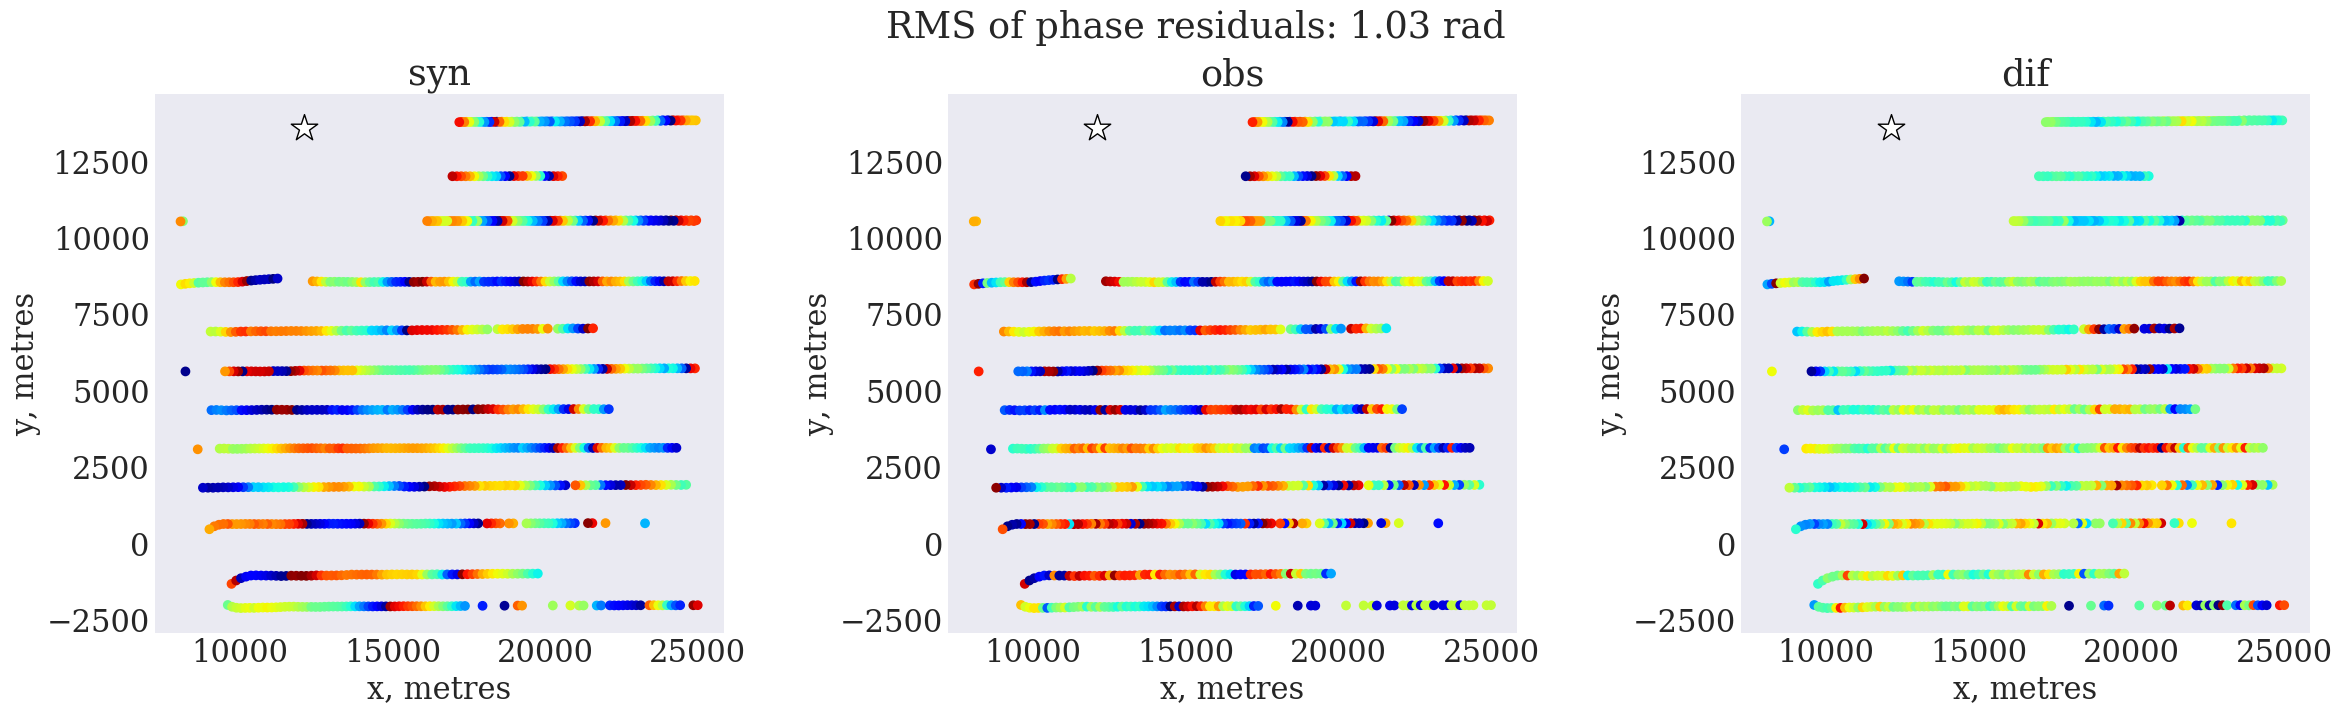

In [61]:
p14.o.dc.it[140][4105].plot_phase(freq=3, figsize=[29,7])

In [44]:
p14.o.dc.it[160][4105]

In [49]:
from fullwavepy.utils import get_phase

In [53]:
# get_phase(p14.o.dc.it[160][4105], freq=3)

In [42]:
p14.o.dc.it[160][4105].plot_phase(freq=3, figsize=[29,7])

KeyError: 'freq'

In [28]:
p14.o.dc.it[1][4105].read_header(freq=3).sample(4)

cdpt  counit  day  delrt    dt  ep   fldr  gain  gelev  gwdep  ...  \
247     1       1  332      0  2500   8  21072     0   -399    399  ...   
358     1       1  334      2  2500   7  24140     0   -399    399  ...   
450     1       1  336      4  2500  30  31607     0   -399    399  ...   
312     1       1  333      3  2500   6  22066     0   -399    399  ...   

     swdep     sx     sy  timbas  tracf  tracl  tracr  tstat  year  \
247    350  15990   4370     447   4105   4926  12353    250  2015   
358    213  12015   6944     860   4105   6313  12487    250  2015   
450    274   9369   8542     773   4105   9451  12631    250  2015   
312    457  20499  10559     164   4105   5414  12435    250  2015   

         offset3d  
247  10012.742382  
358   6659.331873  
450   5757.418606  
312   8932.051612  

[4 rows x 35 columns]

#### OBS 124

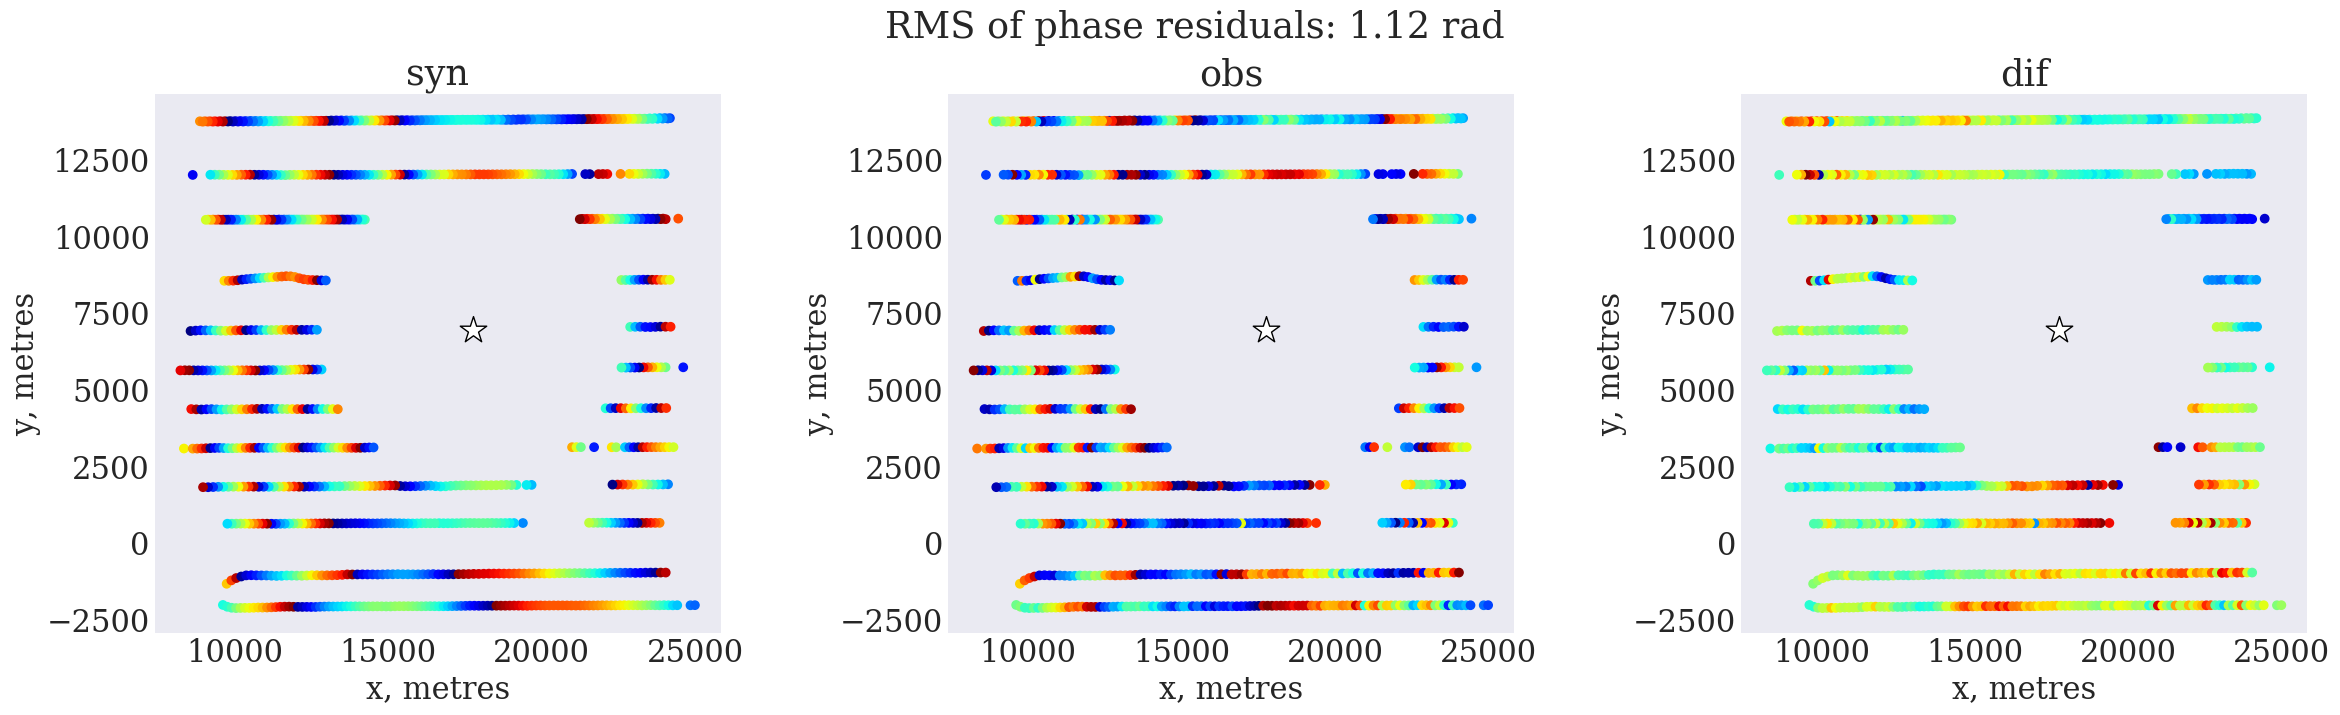

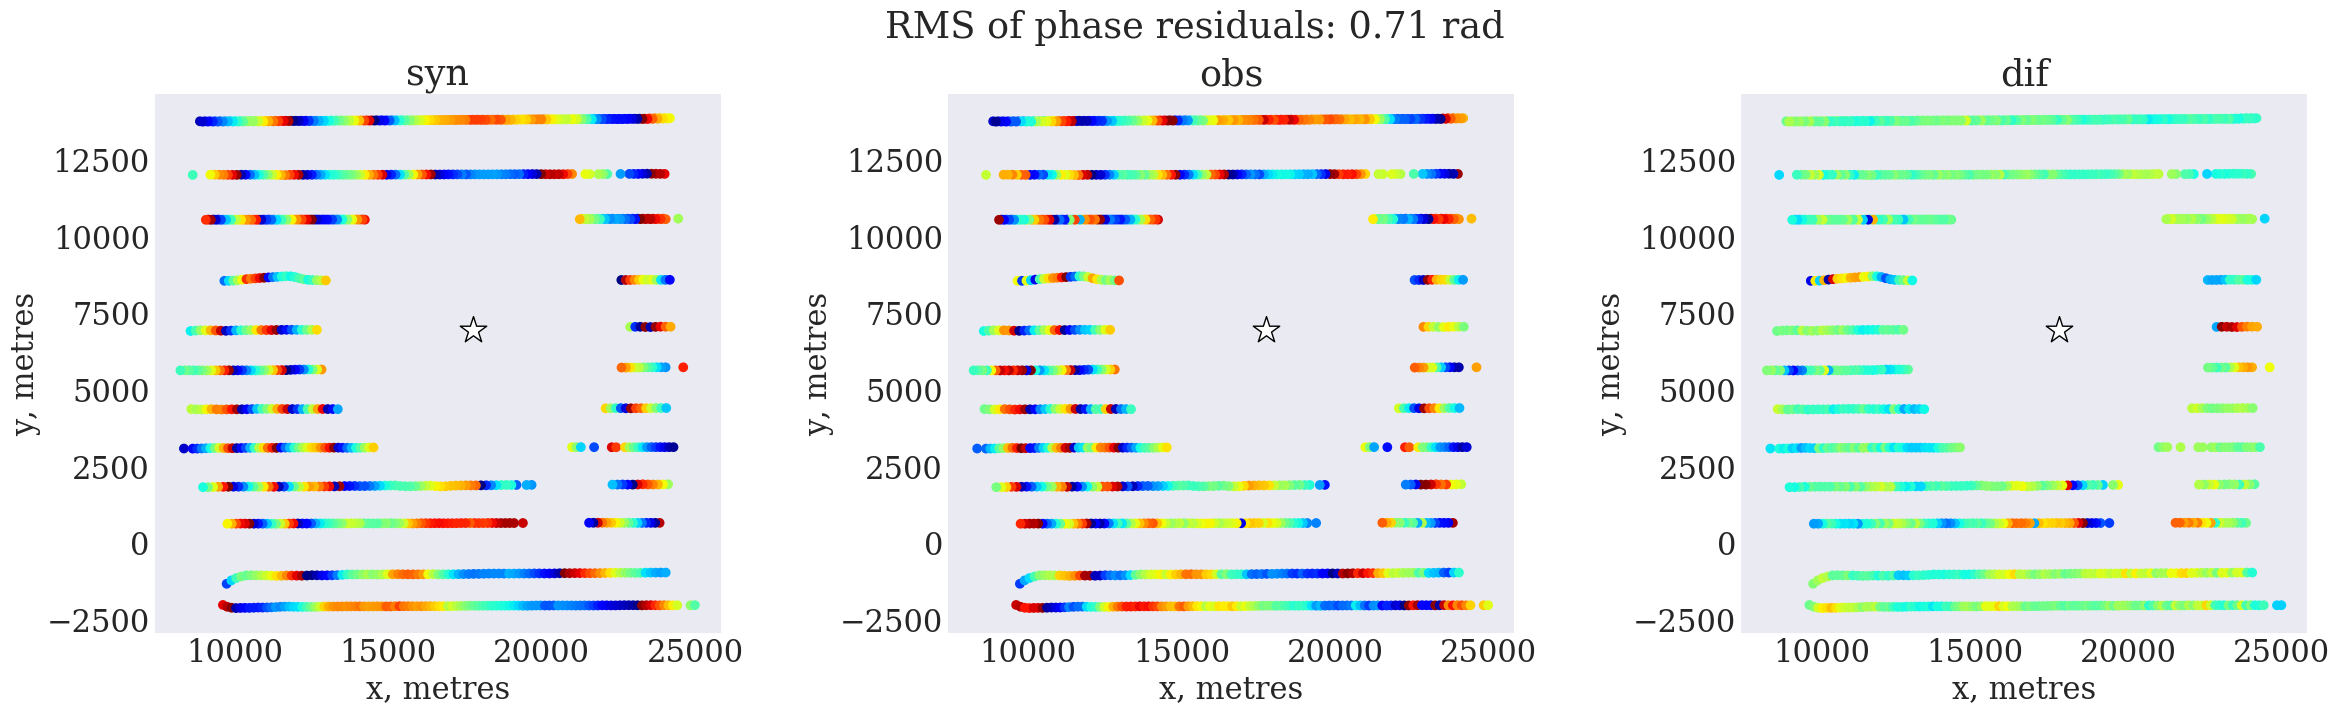

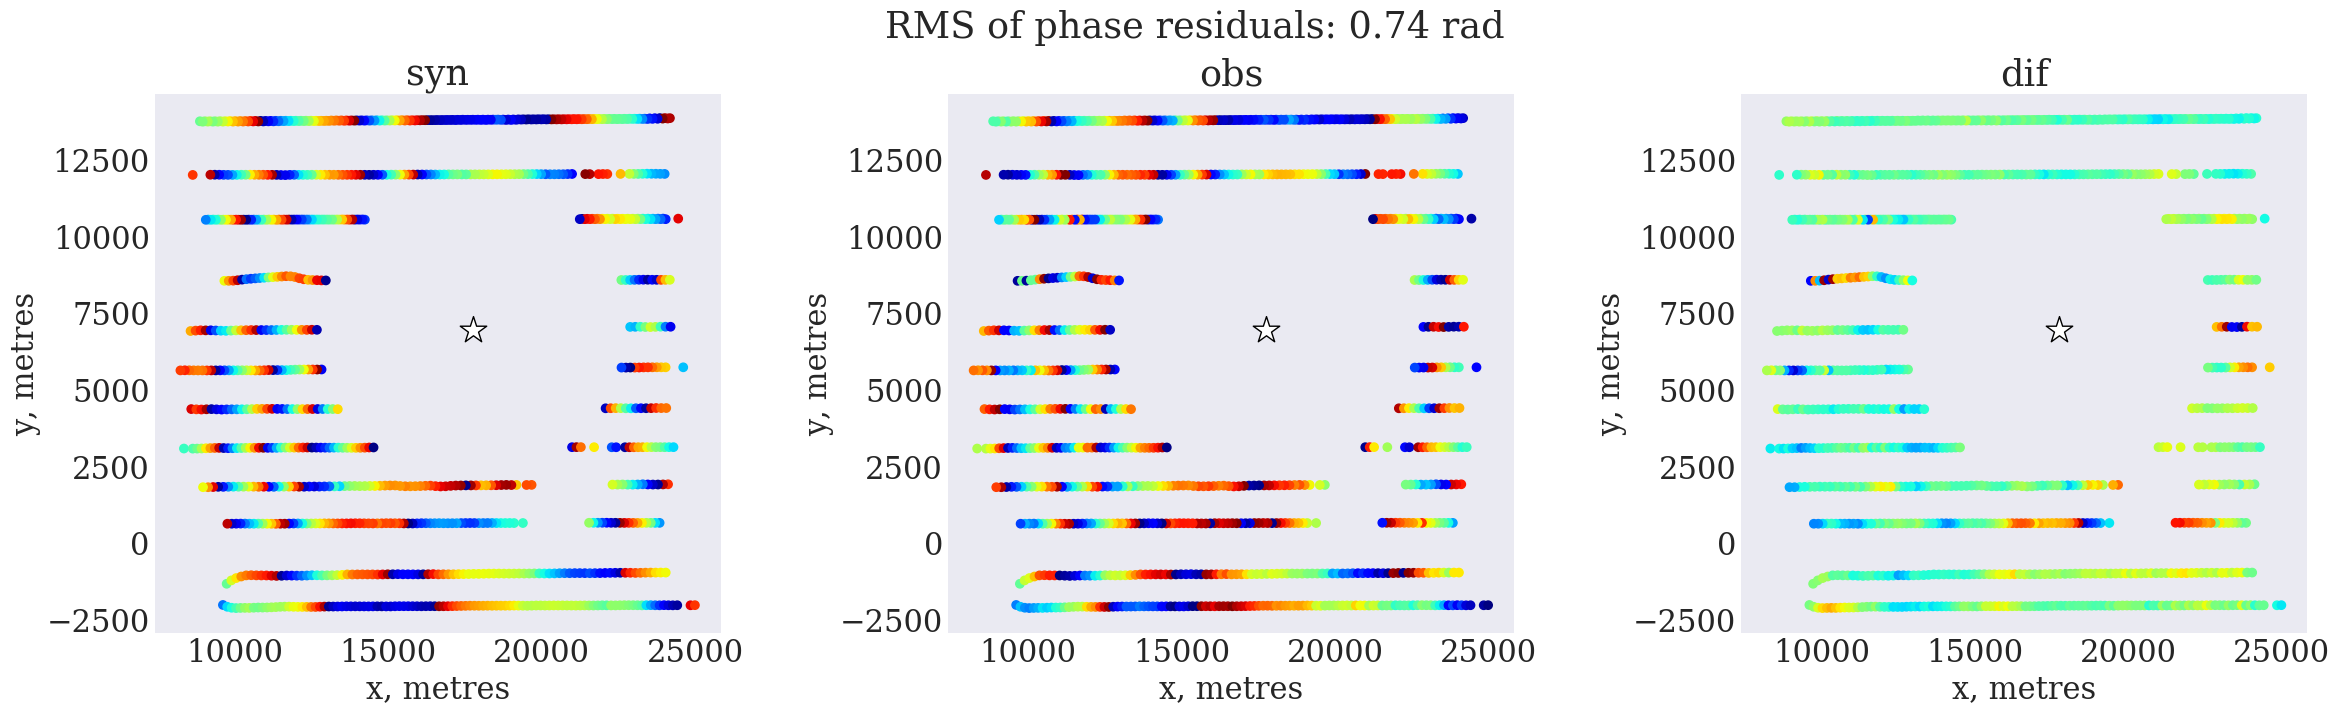

In [69]:
# 
sid = 4124
its = [1, 90, 140]
for it in its:
   p14.o.dc.it[it][sid].plot_phase(freq=3, figsize=[29,7]) 

## Section plots

In [99]:
nsamps

2000

(5, 2.5)

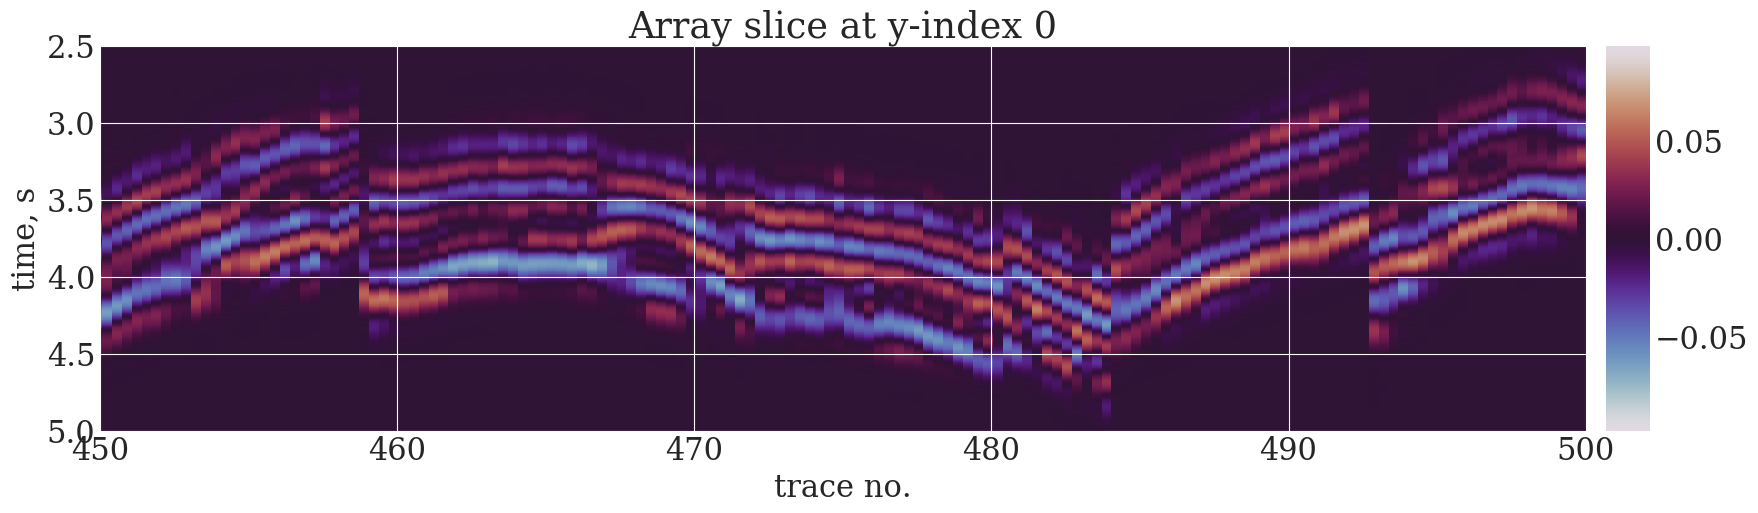

In [121]:
nshots, _, nsamps = p14.o.dc.it[1][4105].read()['syn'].shape
time = nsamps * dt # dt = 0.0025 s
figure(20,5)
p14.o.dc.it[1][4105].plot(cmap='twilight', extent=[[1,nshots],[0,1],[0,time+1]])
plt.grid()
plt.xlabel('trace no.')
plt.ylabel('time, s')
plt.xlim(450,500)
plt.ylim(5,2.5)

# Recovered model

#### Fig. 
Slices through the low-velocity volume.

In [10]:
p14.o.vp.it[90]

#### Fig. 
Low-velocity volume.

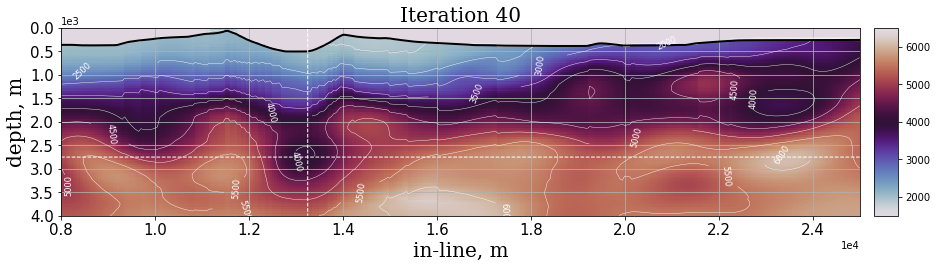

In [504]:
%%time 
figure(15,5)
plot_kol(p14.o.vp, 40, 'y', absolute=1) # see ad-hoc plotters
plt.savefig('test.png')

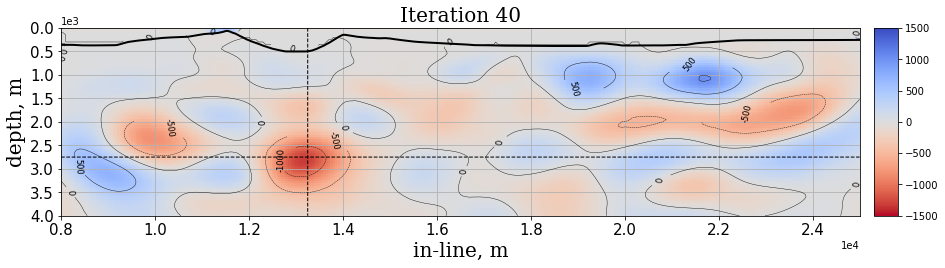

In [505]:
%%time 
figure(15,5)
plot_kol(p14.o.vp, 40, 'y', p14.o.vp.it[0], absolute=1)
plt.savefig('test.png')

#### Fig.
0 vs. 87 iteration.

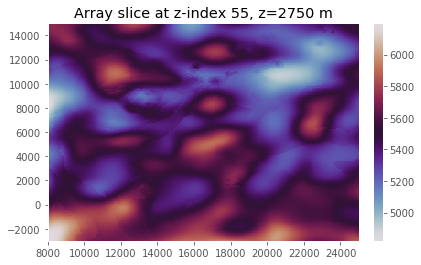

In [41]:
A3d(p14.o.vp.it[0].read()).plot(2750, unit='m', axis='z', cmap='twilight')

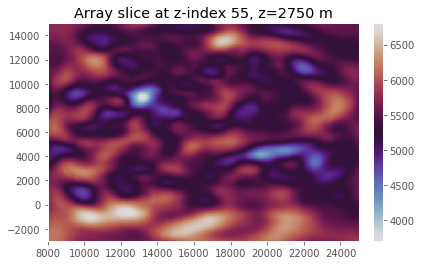

In [40]:
A3d(p14.o.vp.it[87].read()).plot(2750, unit='m', axis='z', cmap='twilight')

#### Fig.
it 88-160. Anomaly got a bit smaller in size and slicing is no longer accurate.

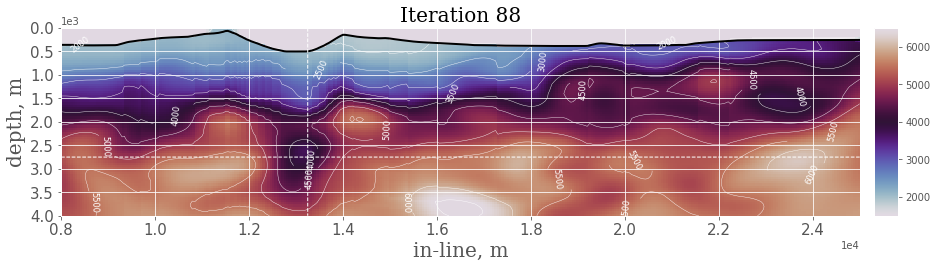

In [23]:
figure(15,5)
plot_kol(p14.o.vp, 88, 'y', absolute=1) # see ad-hoc plotters

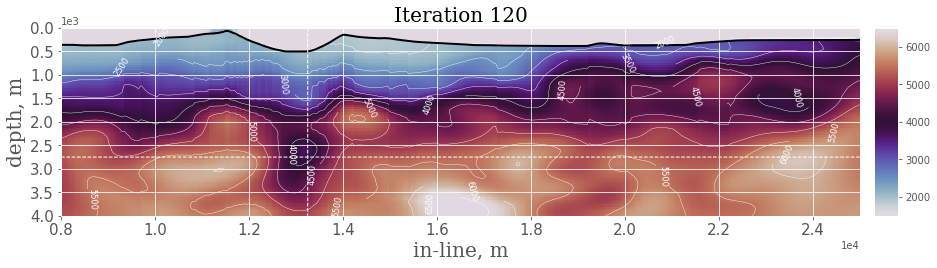

In [24]:
figure(15,5)
plot_kol(p14.o.vp, 120, 'y', absolute=1) # see ad-hoc plotters

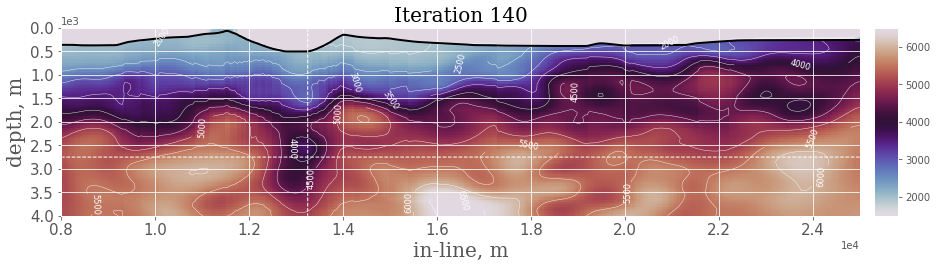

In [25]:
figure(15,5)
plot_kol(p14.o.vp, 140, 'y', absolute=1) # see ad-hoc plotters

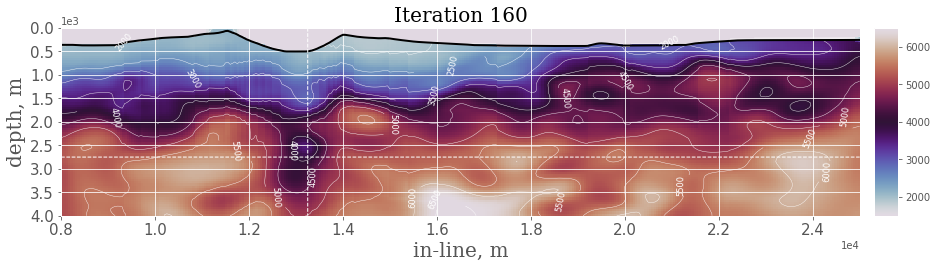

In [26]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'y', absolute=1) # see ad-hoc plotters

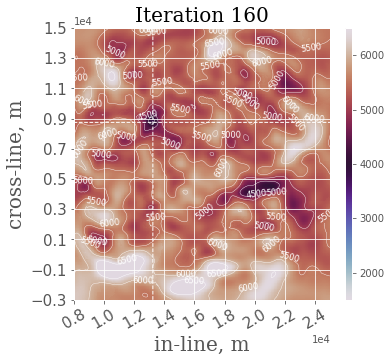

In [71]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'z', absolute=1) # see ad-hoc plotters

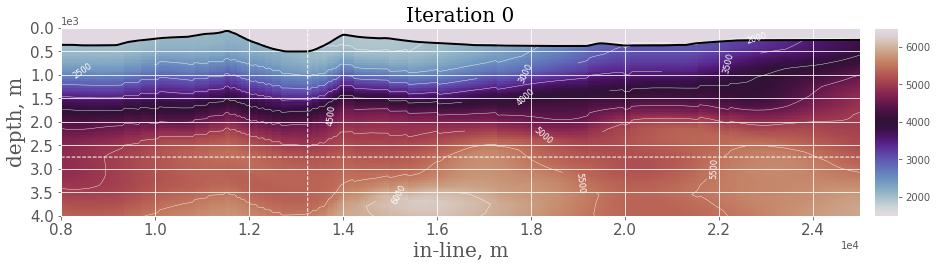

In [84]:
figure(15,5)
plot_kol(p14.o.vp, 0, 'y', absolute=1) # see ad-hoc plotters
plt.savefig('../../figures/ch_kol/kol_svp_yslice.png')

#### Fig.
Anomalies

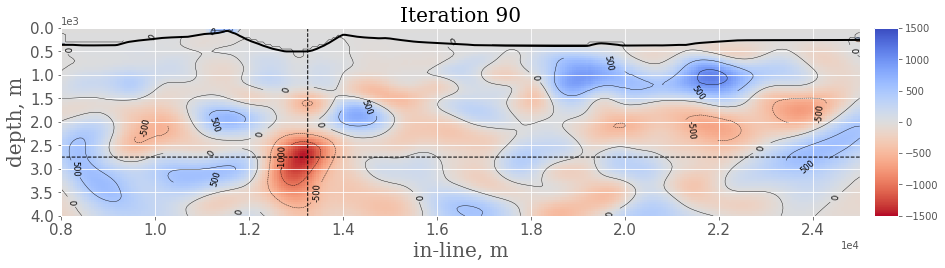

In [36]:
lll(40)
figure(15,5)
plot_kol(p14.o.vp, 90, 'y', p14.o.vp.it[0], absolute=1)

In [82]:
!ls ../..

apt.txt		 figures    README.md	      software
environment.yml  notebooks  requirements.txt  start


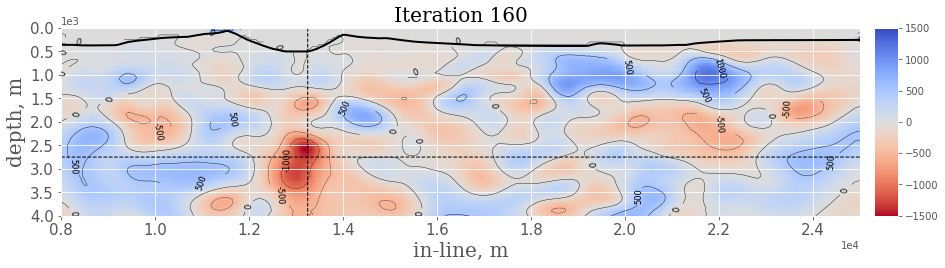

In [83]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'y', p14.o.vp.it[0], absolute=1)
plt.savefig('../../figures/ch_kol/kol_vp_it_160_anom_abs.png')

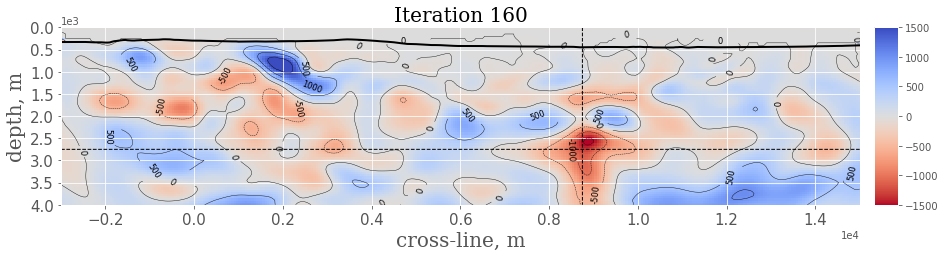

In [41]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'x', p14.o.vp.it[0], absolute=1)

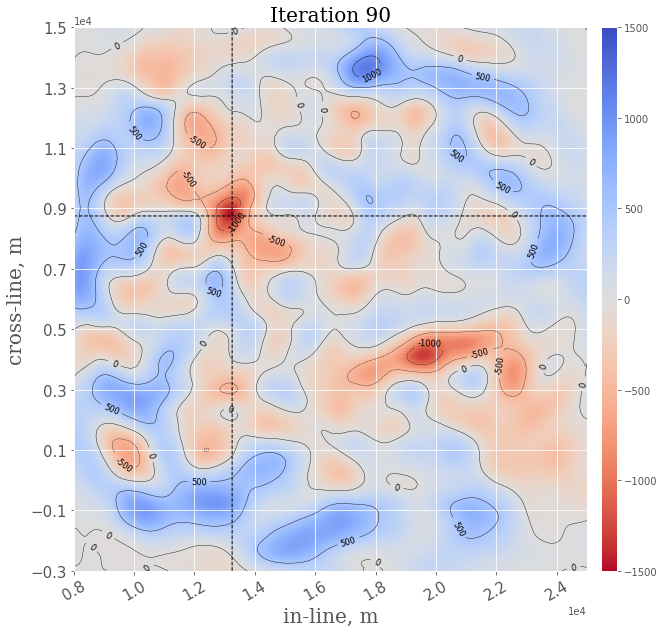

In [86]:
figure(10,10)
plot_kol(p14.o.vp, 90, 'z', p14.o.vp.it[0], absolute=1)

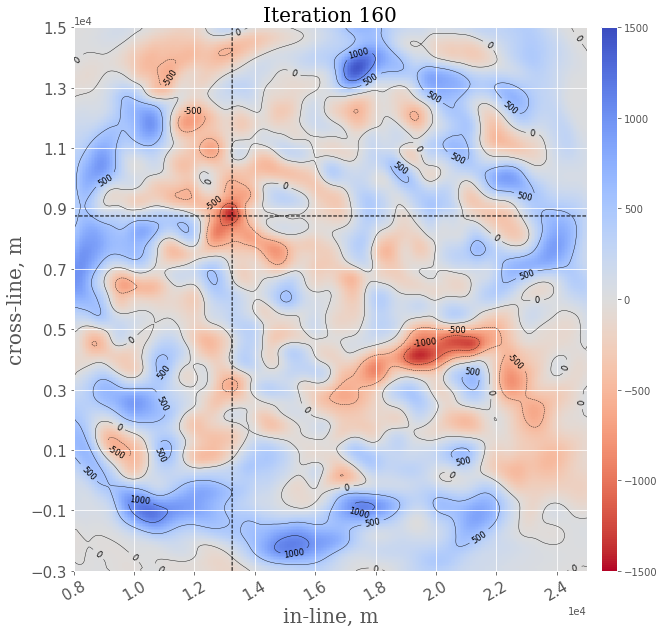

In [87]:
figure(10,10)
plot_kol(p14.o.vp, 160, 'z', p14.o.vp.it[0], absolute=1)

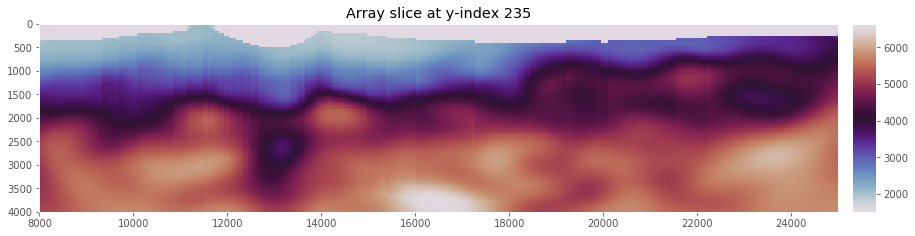

In [60]:
figure(15,5)
p14.o.vp.it[90].plot(node=235, aspect='equal')

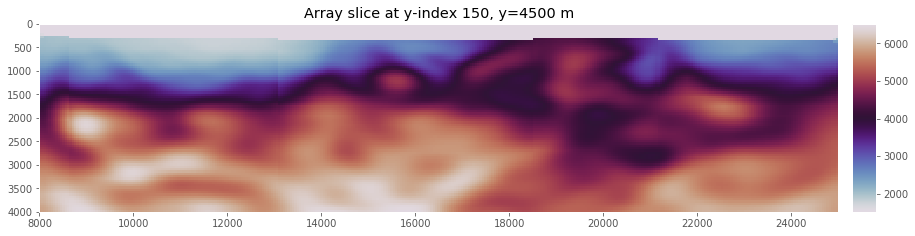

In [65]:
figure(15,5)
A3d(p14.o.vp.it[160].read()).plot(4500, unit='m', aspect='equal', cmap='twilight')

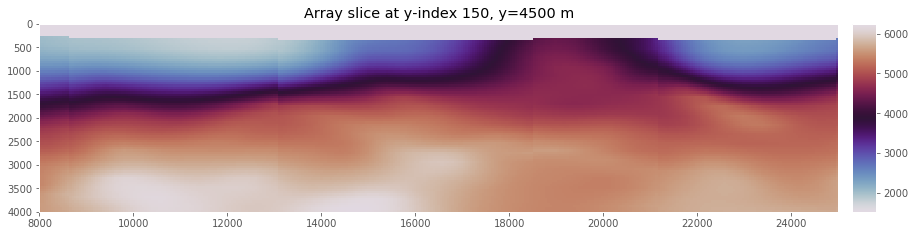

In [66]:
figure(15,5)
A3d(p14.o.vp.it[0].read()).plot(4500, unit='m', aspect='equal', cmap='twilight')

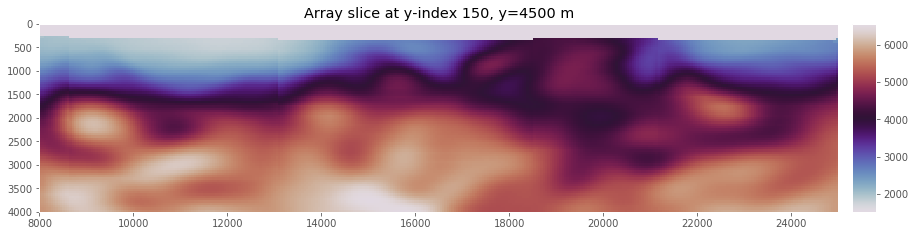

In [67]:
figure(15,5)
A3d(p14.o.vp.it[90].read()).plot(4500, unit='m', aspect='equal', cmap='twilight')

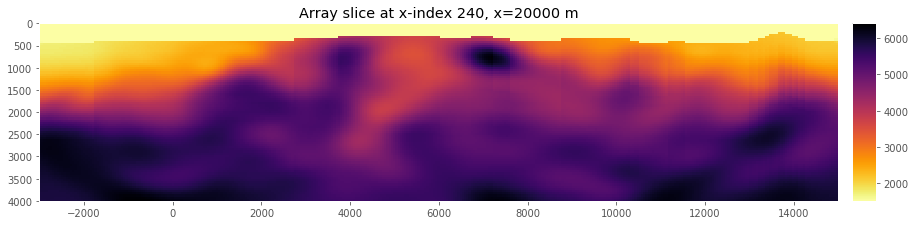

In [75]:
figure(15,5)
A3d(p14.o.vp.it[90].read()).plot(20000, unit='m', axis='x', aspect='equal', cmap='inferno_r')

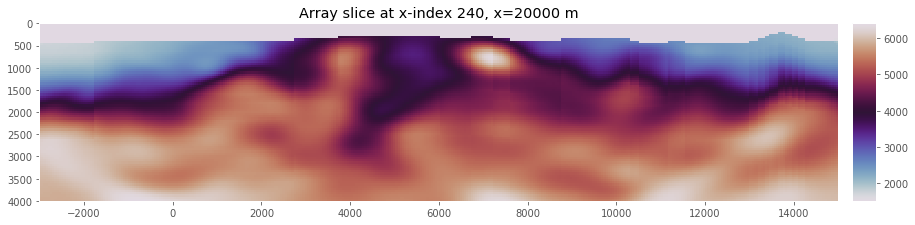

In [69]:
figure(15,5)
A3d(p14.o.vp.it[90].read()).plot(20000, unit='m', axis='x', aspect='equal', cmap='twilight')

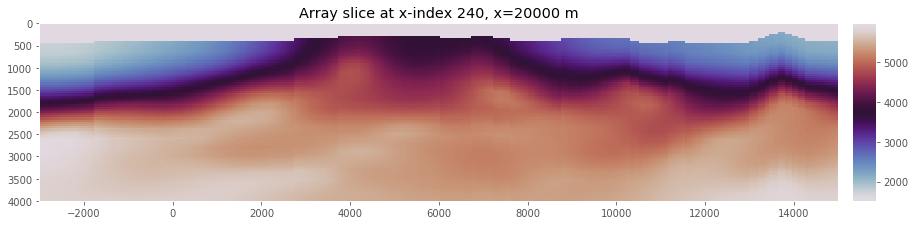

In [70]:
figure(15,5)
A3d(p14.o.vp.it[0].read()).plot(20000, unit='m', axis='x', aspect='equal', cmap='twilight')

#### Alg.  
Save all like above.

In [541]:
for p in [p14]:
    for it in [0]:
        for absolute in [1,0]:
            for bgd in [None, p.i.svp]:
                if bgd is None and (not absolute):
                    continue 
                for at in ['x', 'y', 'z']:
                    if at == 'z':
                        figure(10,10)
                    else:
                        figure(18,8)
                    plot_kol(p.o.vp, it, at=at, bgd=bgd, absolute=absolute)
                    if bgd is None:
                        bid = 'NA'
                    elif bgd == p.i.svp:
                        bid = 'svp'
                    else:
                        raise ValueError('bgd')
                    name = '{p}_it{it}_at-{at}_bgd-{bgd}_abs-{abs}'.format(p=p.name, it=it, bgd=bid, at=at, abs=absolute)
                    fname = 'fig/%s' % name  
                    plt.savefig(fname)
                    plt.close()

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


#### Alg.  
Save all like above.

In [562]:
freq = 3
sids = [i.ID for i in p14.i.s.read().li]
for sid in sids:
    for it in [1] + list(np.arange(20,81,20)):
        print(sid,it)
        dc = p14.out.dc.it[it][sid]
        dc.plot_phase(freq=freq)
        name = '%s_freq%s.png' % (dc.name[:-4], freq)
        fname = 'fig/%s' % name
        plt.savefig(fname)
        plt.close()

4104 1
4104 20
4104 40
4104 60
4104 80
4105 1
4105 20
4105 40
4105 60
4105 80
4109 1
4109 20
4109 40
4109 60
4109 80
4110 1
4110 20
4110 40
4110 60
4110 80
4112 1
4112 20
4112 40
4112 60
4112 80
4123 1
4123 20
4123 40
4123 60
4123 80
4124 1
4124 20
4124 40
4124 60
4124 80
4125 1
4125 20
4125 40
4125 60
4125 80
4137 1
4137 20
4137 40
4137 60
4137 80
4138 1
4138 20
4138 40
4138 60
4138 80
4139 1
4139 20
4139 40
4139 60
4139 80
4157 1
4157 20
4157 40
4157 60
4157 80
4158 1
4158 20
4158 40
4158 60
4158 80
4176 1
4176 20
4176 40
4176 60
4176 80
4177 1
4177 20
4177 40
4177 60
4177 80
4178 1
4178 20
4178 40
4178 60
4178 80


# ...